In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./Data_File/train.csv")
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Feature**</br>
Passengerld : 승객 번호 </br>
Survived : 생존 여부 - 생존시 1 / 사망시 0 </br>
Pclass : 객실 등급 - 숫자가 낮을수록 높은 등급의 객실 </br>
Name : 이름 </br>
Sex : 성별 </br>
Age : 나이 </br>
SibSp : 동반한 형제자매, 배우자 수 </br>
Parch : 동반한 부모, 자식 수 </br>
Ticket : 티켓 종류 </br>
Fare : 요금 </br>
Cabin : 객실 번호 </br>
Embarked : 승선 장소 </br>

**학습에 무의미한 feature 삭제**

In [3]:
def delete_feature(df):
    drop_list = ['PassengerId', 'Name', 'Ticket', 'Embarked']
    for drop_ele in drop_list:
        df.drop(drop_ele, axis = 1, inplace = True)
    return df

### **Feature NaN, data-type 확인**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


</br>**Null값이 있는 feautre** : Age, Cabin </br></br>
**Age**</br>
1\. 평균값 처리 </br>
2\. 해당 index 삭제 </br></br>
**Cabin** </br>
NaN값이 너무 많으므로 새로운 문자열을 할당한다 -> 'N'

Age-mean 처리

In [5]:
def Age_NaN1(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    return df

Age-index 삭제

In [6]:
def Age_NaN2(df):
    index = df[df['Age'].isna() == True].index.tolist()
    df.drop(index, axis = 0, inplace = True)
    return df

Cabin-'N' 치환

In [7]:
def Cabin_NaN1(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    return df

Cabin-삭제

In [8]:
def Cabin_NaN2(df):
    df.drop('Cabin', axis = 1, inplace = True)
    return df

**object형인 feature** : Sex, Cabin </br></br>
**Sex**</br>
성별이므로 카테고리성 OneHotEncoding/LabelEncoding 처리</br></br>
**Cabin**</br>
객실마다 모두 번호가 다르므로 맨 앞 알파벳만 뽑은 후 OneHotEncoding/LabelEncoding 처리

Sex-OneHotEncoding

In [9]:
def Sex_Encoding1(df):
    from sklearn.preprocessing import OneHotEncoder
    df_sex = pd.get_dummies(df['Sex'], dummy_na = False)
    df['female'] = df_sex['female']
    df['male'] = df_sex['male']
    df.drop('Sex', axis = 1, inplace = True)
    return df

Sex-LabelEncoding

In [10]:
def Sex_Encoding2(df):
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    df_sex = label.fit_transform(df['Sex'])
    df['Sex_encoded'] = df_sex
    df.drop('Sex', axis = 1, inplace = True)
    return df

Cabin-알파벳 치환 + OneHotEncoding

In [11]:
def Cabin_Encoding1(df):
    from sklearn.preprocessing import OneHotEncoder
    Cabin_list = df['Cabin'].values.tolist()
    for index, element in enumerate(Cabin_list):
        Cabin_list[index] = element[0]
    replace_cabin = pd.DataFrame(Cabin_list, columns = ['Cabin_encoded'])
    df_cabin = pd.get_dummies(replace_cabin, dummy_na = False)
    df2 = pd.concat([df,df_cabin], axis = 1)
    df2.drop('Cabin', axis = 1, inplace = True)
    df2
    # df2 새로운 객체를 반환하므로 함수 호출 시 train_df = Cabin_Encoding1(train_df) 사용
    return df2

Cabin-알파벳 치환 + LabelEncoding

In [12]:
def Cabin_Encoding2(df):
    from sklearn.preprocessing import LabelEncoder
    Cabin_list = df['Cabin'].values.tolist()
    for index, element in enumerate(Cabin_list):
        Cabin_list[index] = element[0]
    label = LabelEncoder()
    Cabin_list = label.fit_transform(Cabin_list)
    df['Cabin_encoded'] = Cabin_list
    df.drop('Cabin', axis = 1, inplace = True)
    return df

### **Feature와 Label의 분포 확인**

In [13]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("./Data_File/train.csv")
delete_feature(train_df)
Age_NaN1(train_df)
Cabin_NaN2(train_df)
Sex_Encoding2(train_df)

train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<Axes: >

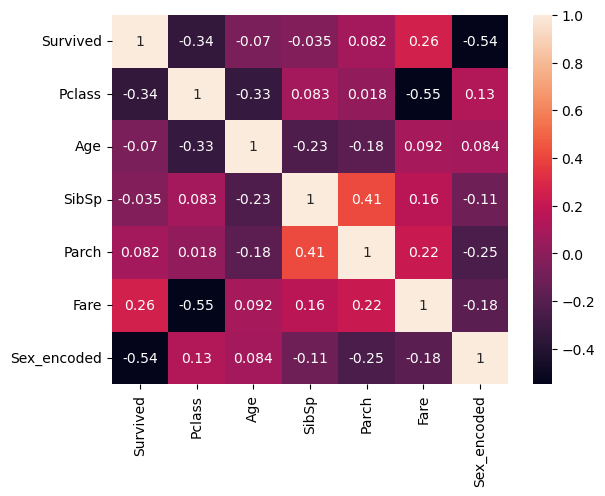

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr()
sns.heatmap(corr, annot = True)

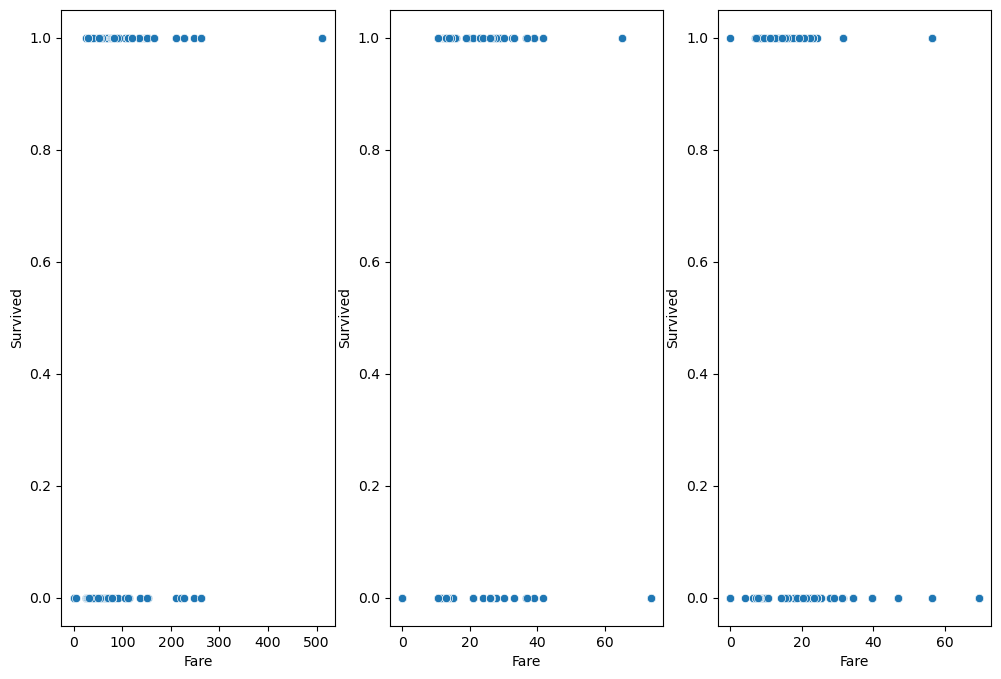

In [15]:

fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize = (12, 8))


class1_df = train_df[train_df['Pclass'] == 1]
class2_df = train_df[train_df['Pclass'] == 2]
class3_df = train_df[train_df['Pclass'] == 3]

sns.scatterplot(x = class1_df['Fare'], y = class1_df['Survived'], ax = ax[0])
sns.scatterplot(x = class2_df['Fare'], y = class2_df['Survived'], ax = ax[1])
sns.scatterplot(x = class3_df['Fare'], y = class3_df['Survived'], ax =ax[2])

plt.show()

**Survived와 상관도가 가장 높은 연속형 feature인 Fare 이상치 제거**

In [16]:
def Fare_IQR(df):
    ndarray = df['Fare'].values
    iqr75 = np.percentile(ndarray, 75)
    iqr25 = np.percentile(ndarray, 25)
    iqr = iqr75 - iqr25
    max = iqr75 + 1.5 * iqr
    min = iqr25 - 1.5 * iqr

    cond1 = df['Fare'] > max
    cond2 = df['Fare'] < min

    drop_index1 = df[cond1].index
    drop_index2 = df[cond2].index

    df.drop(drop_index1, axis = 0, inplace = True)
    df.drop(drop_index2, axis = 0, inplace = True)

    return df

In [17]:
Fare_IQR(train_df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
0,0,3,22.000000,1,0,7.2500,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
5,0,3,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


**Fare 분포 확인(왜도)**

<Axes: >

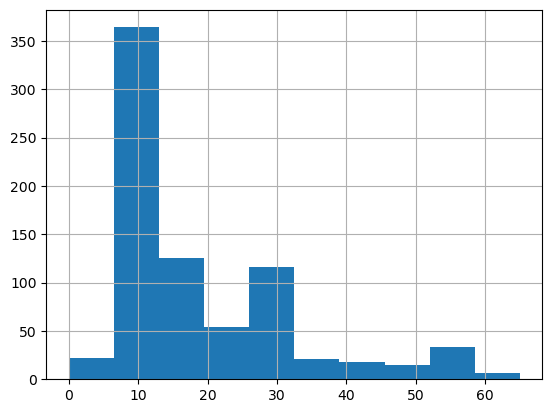

In [18]:
train_df['Fare'].hist()

Fare - log conversion

In [19]:
def Fare_log(df):
    df['Fare'] = np.log1p(df['Fare'])
    return df

<Axes: >

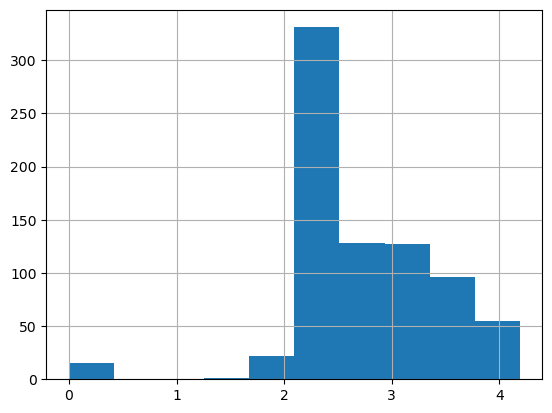

In [25]:
train_df['Fare'].hist()

In [20]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
count,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.339355,2.48000,29.103880,0.437419,0.340645,17.822091,0.685161
std,0.473796,0.73439,12.779988,0.899838,0.785914,13.578085,0.464752
min,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.00000,29.699118,0.000000,0.000000,13.000000,1.000000
75%,1.000000,3.00000,34.000000,1.000000,0.000000,26.000000,1.000000
max,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000,1.000000


데이터 가공 - cross_val 모델 자체 평가(split안한)로 모델들 고르기 - 튜닝 - voting

데이터 함부로 삭제하지 말고 label과 관련도부터 보고 결정

cross_val 할 때 split안한 것을 넣는 듯

데이터 세트가 너무 작기에 split 안하고 자체 cross나 grid 결과의 mean으로 정확도 대체하는 것이 좋을수도

feature_selection과 같은 데이터 가공도 생각해보기 